# Suicide Rate Data Visualization

The dataset we will explore is "Suicide Rate Overview 1985 to 2016," which includes suicide rate data from 1985 to 2016. Analysis of this data can provide deep insights into the factors that may have contributed to suicide rates in different countries during this time period.

Through this analysis, we can gain a better understanding of the trends and variability of suicide rates across countries, aiding potential prevention efforts and a deeper understanding of this sensitive issue.

## Library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import pycountry
import geopandas

import library that will be used

## Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MRadityaAdhirajasa/Dataset/main/master.csv')

Dataset : https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016/data

## Exploratory Data Analysis

In [ ]:
#displays top 5 data

df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# dataset consists of 27820 rows and 12 columns

df.shape

(27820, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
# check missing data

df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Pre-Processing

In [ ]:
# Drop this cause most of the HDIForYear value is empty

df = df.drop(['HDI for year','country-year'],axis=1)

In [ ]:
# Rename columns

df.rename(columns={"suicides/100k pop":"suicides_pop",
                    " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')


## Visualization

### Gender Evaluation

In [ ]:
# count the number of males and females

df['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

<ipython-input-12-92c00bdaa5dc>:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  genderwise_suicide = df.pivot_table(index='sex' , aggfunc='sum')


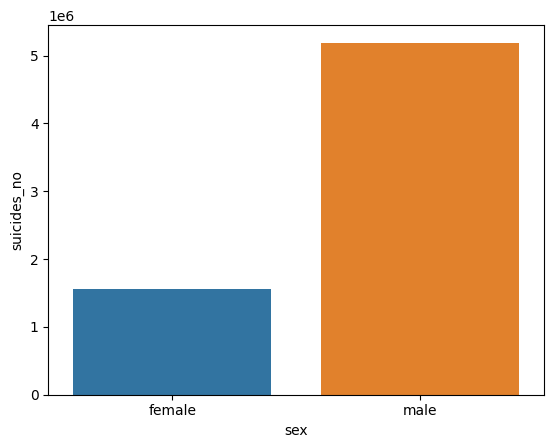

In [ ]:
# visualization of number of suicides by sex

genderwise_suicide = df.pivot_table(index='sex' , aggfunc='sum')

sns.barplot(x = genderwise_suicide.index , y = genderwise_suicide.suicides_no)
sns.set_style('white')

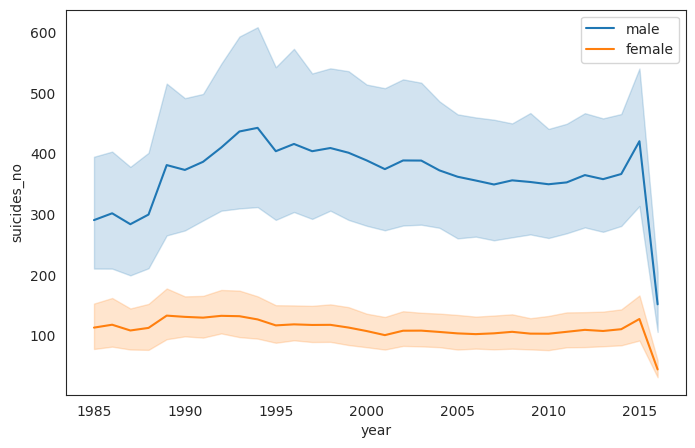

In [ ]:
# visualization of the number of male and female suicides by year

male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]

plt.figure(figsize=(8,5))

lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population, label="male")
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population, label="female")

Based on the data visualization above, we can see :


*   the number of male and female data is equal, 13.910 data
*   males commit more suicides than females
*   male suicide rates increased in 1990 and decreased in 1995 then decrease dramatically after 2015. while women tend to stabilize and decrease dramatically after 2015




### Age Evaluation

In [ ]:
# count the number of data for each age

df['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

<Axes: xlabel='sex', ylabel='suicides_no'>

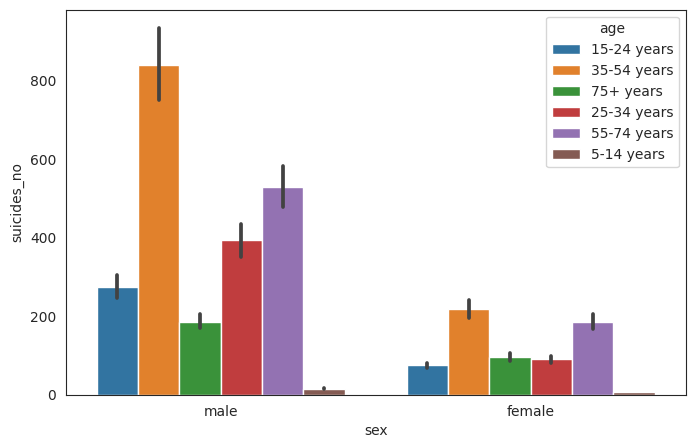

In [ ]:
# visualize number of suicide by age

plt.figure(figsize=(8,5))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

In [ ]:
# examined the total suicide rates and prepared a chart that handled the most from the least

grouop_age = df.groupby(['age','sex'])['suicides_no'].sum().unstack()
grouop_age = grouop_age.reset_index().melt(id_vars='age')

In [ ]:
grouop_age_female = grouop_age.iloc[:6,:]
grouop_age_male = grouop_age.iloc[6:,:]

In [ ]:
grouop_age_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [ ]:
grouop_age_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


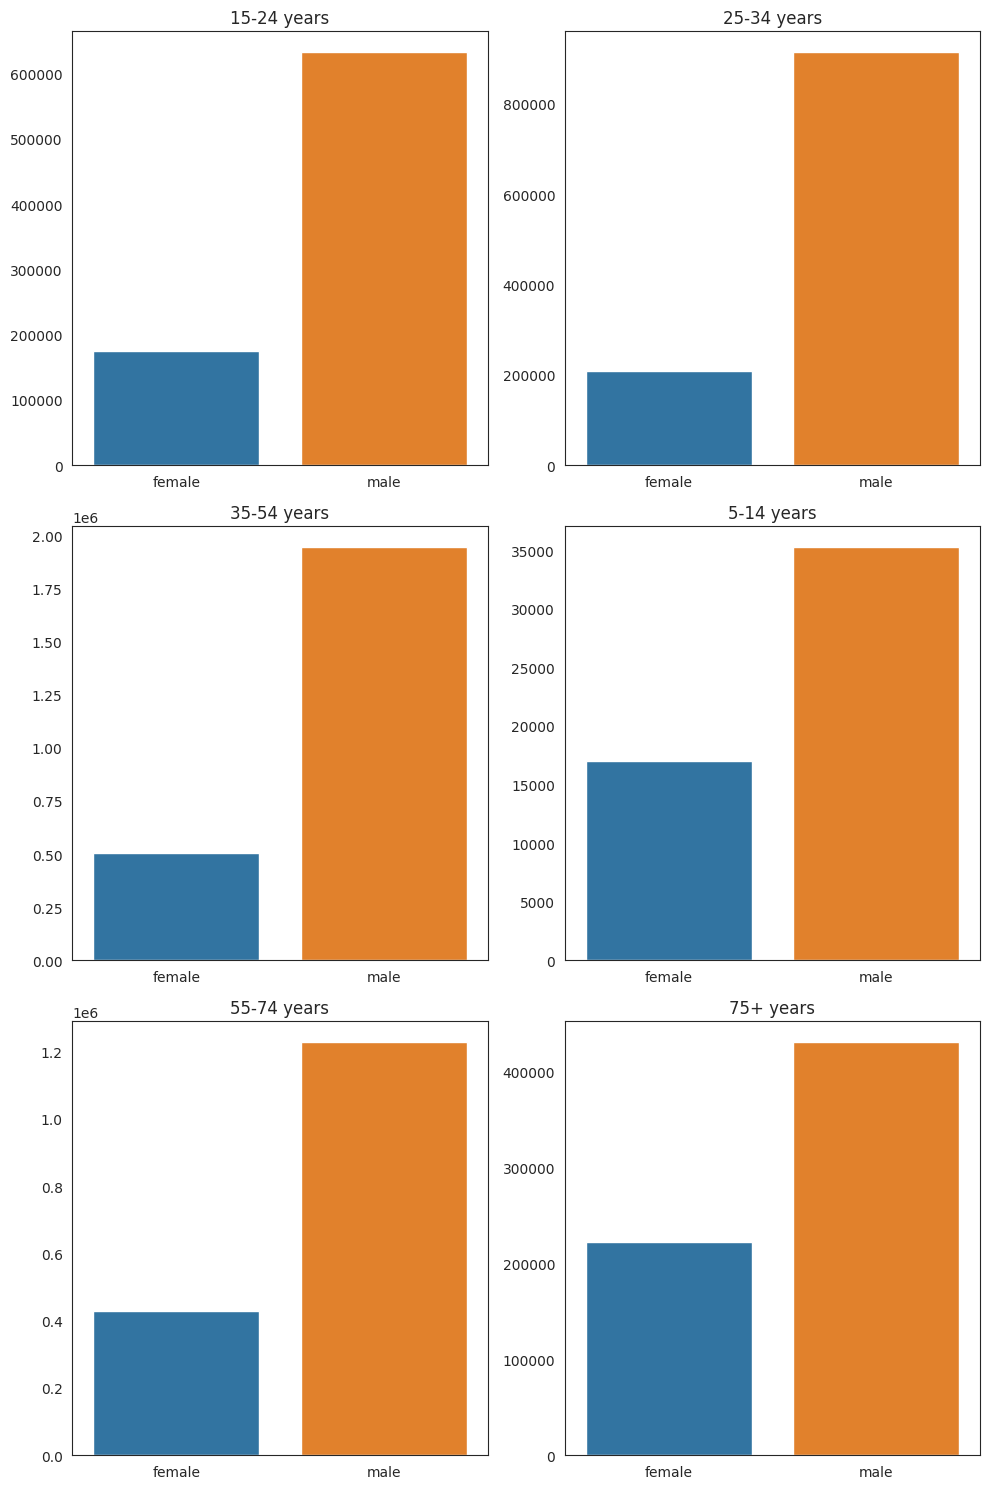

In [ ]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]])
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()

Based on the data visualization above, we can see :

*   the amount of data from age 15 - 75+ same, 4.642 data. while data from age 5 - 14 is 4.610 data
*   suicide rates are highest for men and women between the ages of 35 - 54. while the lowest between 5 - 14
*   in every age range the suicide rate for males is higher than from females



### Generation Visualization

In [ ]:
# count the number of data for each generation

df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

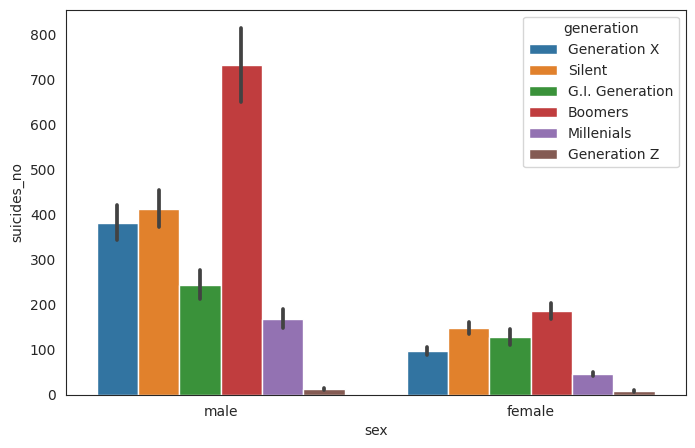

In [ ]:
# visualize number of suicide by generation

plt.figure(figsize=(8,5))

gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation', data = df)

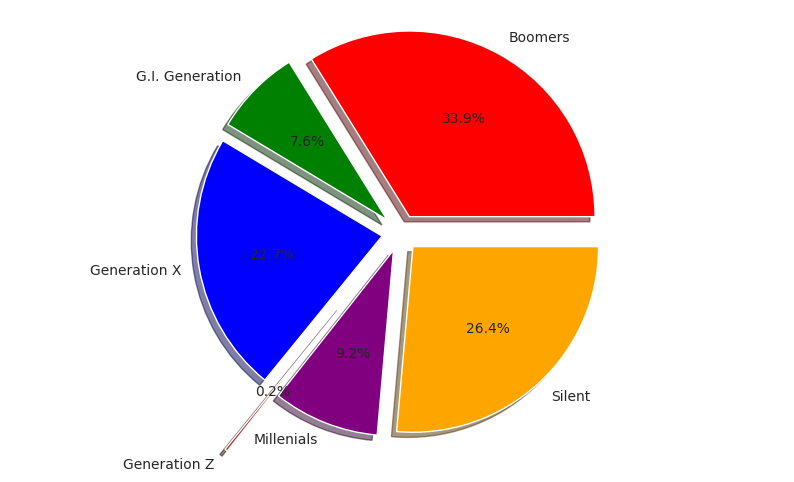

In [ ]:
# visualization the highest number of suicides by generation with pie

gen_sui = df.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

colors = ['red', 'green', 'blue', 'brown', 'purple', 'orange']

fig, ax = plt.subplots(figsize=(10, 6),)
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x,  autopct='%1.1f%%', shadow=True, startangle=0, colors=colors)
ax.axis('equal')
plt.show()

Based on the data visualization above, we can see :
*   most male and female suicides are from generation x
*   boomers are in the first place with 33.9%. generation Z are in the last place with 0.2%



### Country Evaluation

In [ ]:
suicides_no=[]
for country in df.country.unique():
    suicides_no.append(sum(df[df['country']==country].suicides_no))

In [ ]:
suicides_no=pd.DataFrame(suicides_no,columns=['suicides_no'])
country=pd.DataFrame(df.country.unique(),columns=['country'])
df_suicide_country=pd.concat([suicides_no,country],axis=1)

In [ ]:
df_suicide_country=df_suicide_country.sort_values(by='suicides_no',ascending=False)

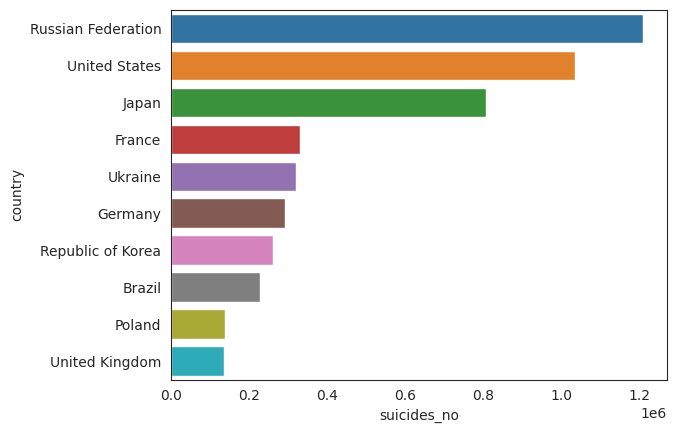

In [ ]:
sns.barplot(y=df_suicide_country.country[:10],x=df_suicide_country.suicides_no[:10])
plt.show()

Based on the data visualization above, we can see :
*   most suiceide are from Russian Federation

## Conclusion

Analysis of suicide data from 1985 - 2016 showed Rusian Federation as the country with the highest suicide rate. This finding highlights the need for further research on precipitating factors and expansion of prevention efforts at the country level. In addition, it was observed that men aged 35-45 from the boomer generation had the highest suicide rate. The conclusions from this analysis can help design more effective interventions to reduce suicide rates and improve mental health support, particularly in vulnerable groups.